## SPRINT 4  ##################################################

# PERFORMANCE ANALYSIS 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv(r"Football_Data_Merged_Cleaned.csv")
data

,appearance_id,game_id,player_id,date_x,player_name_x,competition_id_x,yellow_cards,red_cards,goals,assists,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2222536_1321,2222536.0,1321,2012-08-26 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,1.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
1,2231391_1321,2231391.0,1321,2012-09-01 00:00:00,Jermaine Jones,L1,0.0,0.0,1.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
2,2231391_1321,2231391.0,1321,2012-09-01 00:00:00,Jermaine Jones,L1,0.0,0.0,1.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
3,2231397_1321,2231397.0,1321,2012-09-28 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
4,2231397_1321,2231397.0,1321,2012-09-28 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649,2224542_119169,2757218.0,795738,2016-07-20 12:00:00,Fabian Johnson,L1,0.0,0.0,0.0,0.0,...,United States,2003-08-26,Attacking Midfield,Midfield,right,175.0,4500000.0,4500000.0,2027-06-30,Wasserman
4650,2224542_119169,2757218.0,796429,2016-07-20 12:00:00,Fabian Johnson,L1,0.0,0.0,0.0,0.0,...,United States,2003-11-18,Right-Back,Defender,right,185.0,1500000.0,3000000.0,2025-12-31,CAA Stellar
4651,2224542_119169,2757218.0,860812,2016-07-20 12:00:00,Fabian Johnson,L1,0.0,0.0,0.0,0.0,...,United States,2002-04-22,Left Winger,Attack,right,182.0,350000.0,350000.0,2026-06-30,FGM
4652,2224542_119169,2757218.0,971613,2016-07-20 12:00:00,Fabian Johnson,L1,0.0,0.0,0.0,0.0,...,United States,2000-06-21,Defensive Midfield,Midfield,right,193.0,150000.0,150000.0,2026-05-31,Wasserman


In [3]:
data.columns

Index(['appearance_id', 'game_id', 'player_id', 'date_x', 'player_name_x',
       'competition_id_x', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'game_event_id', 'date_y', 'minute', 'type_x',
       'description', 'player_in_id', 'player_assist_id', 'game_lineups_id',
       'type_y', 'number', 'player_name_y', 'team_captain', 'position_x',
       'competition_id_y', 'season', 'round', 'date', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'date_of_birth',
       'sub_position', 'position_y', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'agent_name'],
      dtype='object')

# BUSINESS OBJECTIVES FOR PERFORMANCE ANALYSIS

#              SOLVE AT LEAST TWO BUSINESS QUESTIONS REALATED TO LOGISTIC REGRESSION  FOR CLASSIFICATION

                                              Predicting Match Day High Performance
 # BUSINESS OBJECTIVE: Can we predict if a player will have a high-performance match based on historical data?

Confusion Matrix:
 [[1378    4]
 [  10    5]]
Accuracy: 0.9899785254115963
Recall: 0.6652194886637723
Precision: 0.7741754723022735
F1 Score: 0.705806257521059


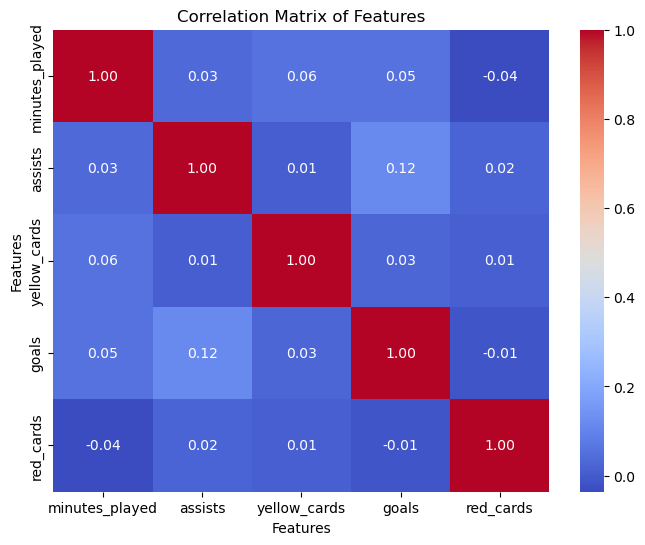

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import seaborn as sb
import matplotlib.pyplot as plt

# Define the target variable
data['high_performance'] = ((data['goals'] >0) & (data['assists']) >0).astype(int)

# Select features
features = ['minutes_played', 'assists', 'yellow_cards','goals','red_cards']
X = data[features]
y = data['high_performance']  

# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix
print("Confusion Matrix:\n", cm)
# General Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
# Calculate the correlation matrix for the features
correlation_matrix = data[features].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix of Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()


In [ ]:
## Interpretation:

#### The Logistic Regression model was trained to predict whether a player will have a high-performance match, defined as scoring at least one goal and providing at least one assist.

#### Accuracy: The model achieved an accuracy of 0.98  on the test set. This means that the model correctly predicted whether a player would have a high-performance match in 98% of  in the test dataset.
#### Classification Report:
#### precision: The precision score of 0.77 for the high-performance class reflects the proportion of correctly predicted high-performance matches (true positives) out of all matches predicted as high-performance. In simpler terms, 77% of the predictions for high-performance matches were correct.
### Recall:The recall score of0.66 for the high-performance class indicates how well the model identifies players who truly had high-performance matches.
### F1 Score: The F1-score of 0.75 balances precisioF1 Score:
#### The F1-score of 0.75 balances precision and recall for the high-performance class. This metric indicates the overall effectiveness of the model in predicting high-performance matches, accounting for both false positives and false negatives.n and recall, confirming the model's ability to perform well in both identifying true positives and avoiding false positives.


In [29]:
data.columns

Index(['player_id', 'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'position_x',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'game_lineups_id', 'game_id_x', 'type_x', 'number', 'player_name_x',
       'team_captain', 'position_y', 'appearance_id', 'game_id_y', 'date_x',
       'player_name_y', 'competition_id_x', 'yellow_cards', 'red_cards',
       'goals', 'assists', 'minutes_played', 'game_event_id', 'date_y',
       'game_id', 'minute', 'type_y', 'description', 'player_in_id',
       'player_assist_id', 'competition_id_y', 'season', 'round', 'date',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       


### Business Question2: Can we predict whether a football clubs will win or lose a game based on factors such as the number of goals scored, attendance home/away status, and other etc..?

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sb
import matplotlib.pyplot as plt


# Target variable: 1 if home team wins, 0 if away team wins
data['match_outcome'] = (data['home_club_goals'] > data['away_club_goals']).astype(int)

# Features: We will use home/away goals, attendance, etc.
X = data[['home_club_goals', 'away_club_goals', 'attendance']]  # Independent variables
y = data['match_outcome']  # Target variable (win or loss)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       599
           1       1.00      1.00      1.00       332

    accuracy                           1.00       931
   macro avg       1.00      1.00      1.00       931
weighted avg       1.00      1.00      1.00       931



In [ ]:
## Interpretation:

#### The Logistic Regression model used to predict match outcomes of the home win or away win 

#### Accuracy:
#### The model achieved an accuracy of 1.0 on the test set, indicating that it correctly predicted every match outcome (whether the home team won or the away team won) for the entire test dataset.
#### Classification Report:
#### The precision, recall, and F1-score for home win and away win is 1.00, indicating that the model is perfectly identifying both home wins and away wins without any errors.
#### Cross-Validation:
#### The cross-validation scores across all folds were also 1.0, further confirming that the model performs perfectly when evaluated on different subsets of the data.